# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [ ]:
import torch
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [ ]:
a = torch.randint(1, 10, (3,4))
b = torch.randint(1, 10, (12,))
c = b.reshape(2,2,3)

In [ ]:
a

tensor([[6, 3, 1, 1],
        [4, 2, 9, 1],
        [5, 8, 8, 6]])

In [ ]:
b

tensor([9, 1, 8, 1, 8, 5, 4, 4, 9, 1, 1, 4])

In [ ]:
c

tensor([[[9, 1, 8],
         [1, 8, 5]],

        [[4, 4, 9],
         [1, 1, 4]]])

In [ ]:
a[:,0]

tensor([6, 4, 5])

### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [ ]:
a = torch.randint(1, 10, (5, 2))
b = torch.randint(1, 10, (1, 10))
c = b.reshape(5, 2)

In [ ]:
print(a)
print(c)

tensor([[7, 6],
        [6, 9],
        [1, 1],
        [6, 4],
        [7, 5]])
tensor([[2, 6],
        [5, 1],
        [8, 4],
        [4, 7],
        [6, 7]])


In [ ]:
a + c

tensor([[ 9, 12],
        [11, 10],
        [ 9,  5],
        [10, 11],
        [13, 12]])

In [ ]:
a - c

tensor([[ 5,  0],
        [ 1,  8],
        [-7, -3],
        [ 2, -3],
        [ 1, -2]])

In [ ]:
a * c

tensor([[14, 36],
        [30,  9],
        [ 8,  4],
        [24, 28],
        [42, 35]])

In [ ]:
a/c

tensor([[3.5000, 1.0000],
        [1.2000, 9.0000],
        [0.1250, 0.2500],
        [1.5000, 0.5714],
        [1.1667, 0.7143]])

In [ ]:
a.transpose(-2, 1) @ c

tensor([[118, 143],
        [111, 112]])

In [ ]:
a @ c.transpose(-2, 1)

tensor([[50, 41, 80, 70, 84],
        [66, 39, 84, 87, 99],
        [ 8,  6, 12, 11, 13],
        [36, 34, 64, 52, 64],
        [44, 40, 76, 63, 77]])

### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

#### Ответ 1:

In [ ]:
images = torch.zeros((100, 200, 200, 3))

#### Ответ 2:

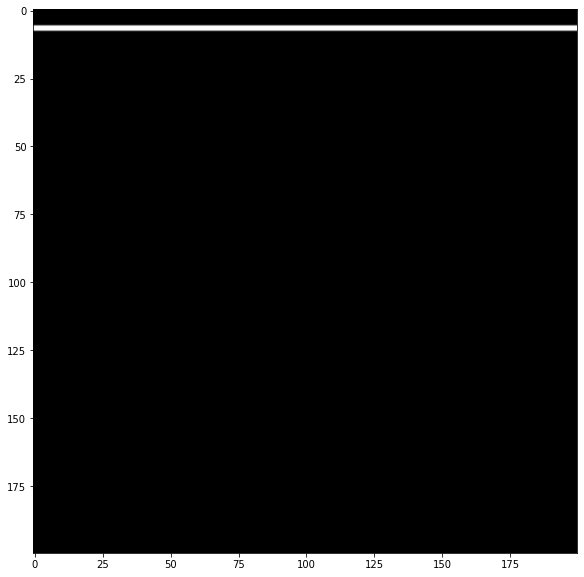

In [ ]:
def change_line(i, tens):
    tens[i,(i*2):(i*2 + 2),:] = torch.tensor([255, 255, 255])
    plt.figure(figsize=(10, 10))
    plt.imshow(tens[i].int())
change_line(3, images)

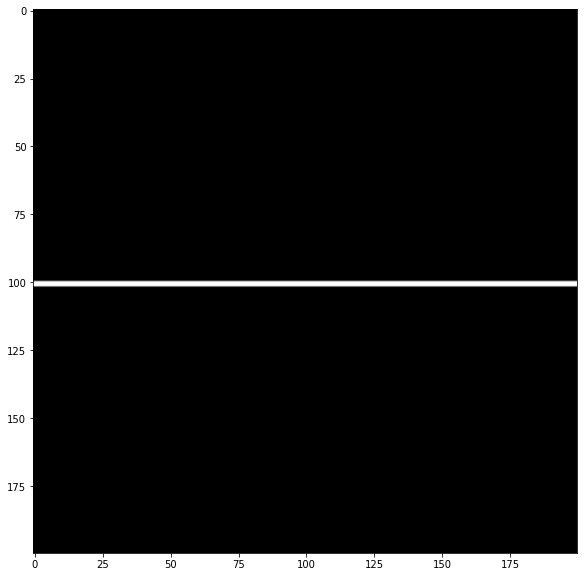

In [ ]:
change_line(50, images)

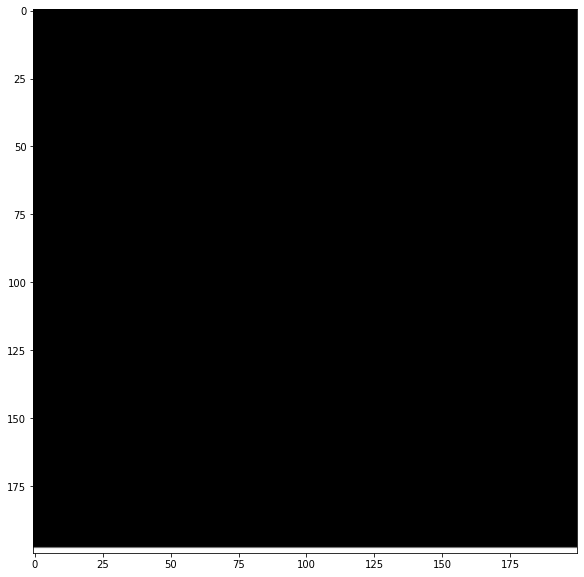

In [ ]:
change_line(99, images)

In [ ]:
def change_line(i, tens):
    tens[i,(i*2):(i*2 + 2),:] = torch.tensor([255, 255, 255])
for i in range(100):
  change_line(i, images)

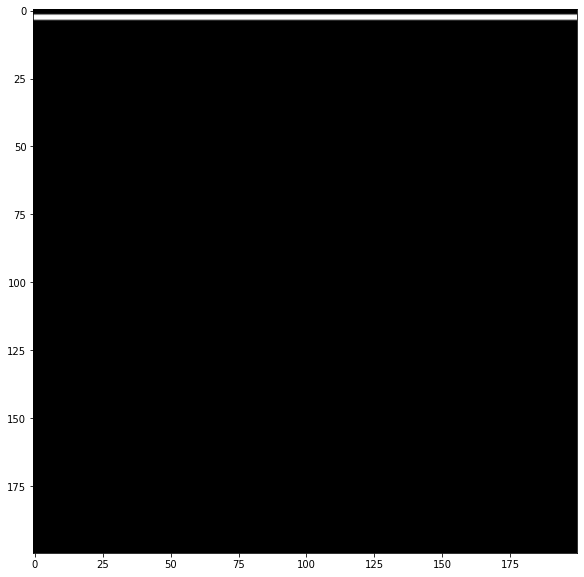

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(images[1].int())

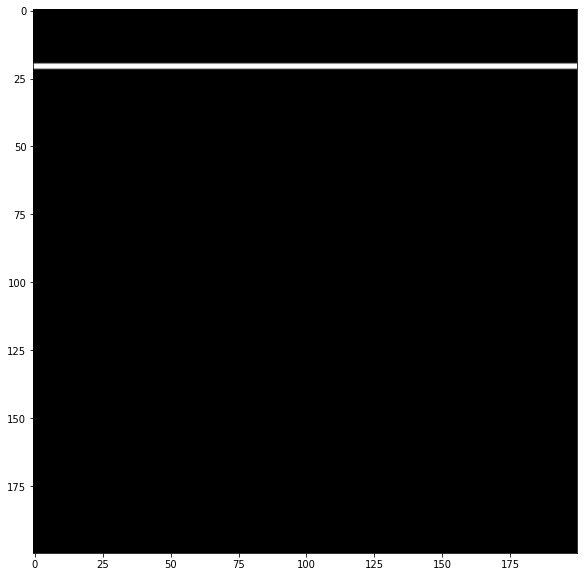

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(images[10].int())

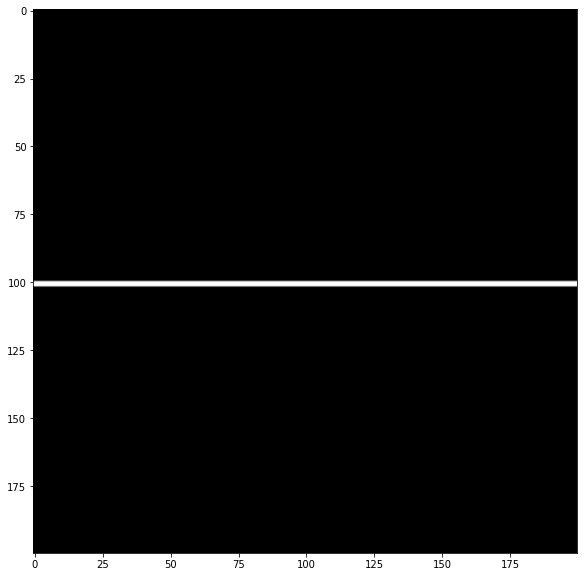

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(images[50].int())

#### Ответ 3:

torch.Size([200, 200, 3])


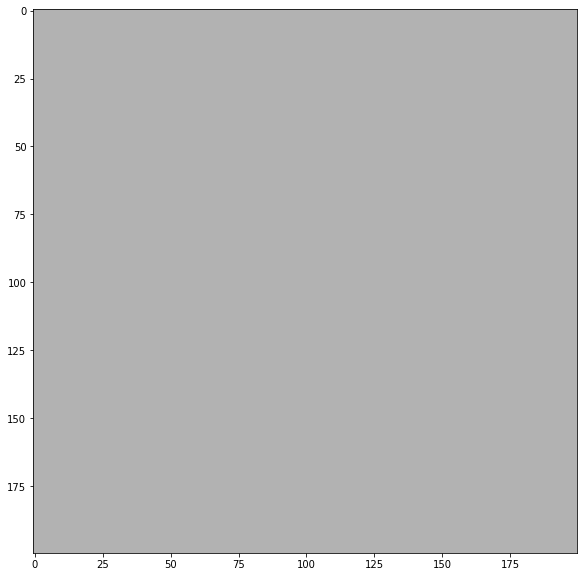

In [ ]:
''' m = images.float().mean((-4)) '''
m = images.float().mean((-4))#
m = torch.mean(images.float(), dim=0)
plt.figure(figsize=(10,10))
plt.imshow((m*70).int())
print(m.shape)
plt.show()

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [ ]:
cpu = torch.device('cpu')
gpu = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

a = torch.zeros((2,3,4), device=gpu)
b = torch.zeros((1,8,3), device=gpu)

a.uniform_()
b.uniform_()
print(a)
print(b)

tensor([[[0.2269, 0.3921, 0.3754, 0.1763],
         [0.6301, 0.7063, 0.2716, 0.5314],
         [0.7821, 0.3415, 0.5247, 0.0201]],

        [[0.1277, 0.8034, 0.1298, 0.6365],
         [0.1689, 0.3049, 0.6935, 0.5481],
         [0.6471, 0.5920, 0.3825, 0.7900]]])
tensor([[[0.6506, 0.9218, 0.7508],
         [0.4339, 0.1837, 0.3038],
         [0.6109, 0.6788, 0.0256],
         [0.9397, 0.7662, 0.8259],
         [0.0343, 0.8384, 0.5431],
         [0.4844, 0.5271, 0.3217],
         [0.4547, 0.5710, 0.9621],
         [0.4486, 0.7186, 0.5684]]])


In [ ]:
c = b.reshape(a.shape)
print(c)

tensor([[[0.6506, 0.9218, 0.7508, 0.4339],
         [0.1837, 0.3038, 0.6109, 0.6788],
         [0.0256, 0.9397, 0.7662, 0.8259]],

        [[0.0343, 0.8384, 0.5431, 0.4844],
         [0.5271, 0.3217, 0.4547, 0.5710],
         [0.9621, 0.4486, 0.7186, 0.5684]]])


In [ ]:
c.to(cpu)
a.to(cpu)

tensor([[[0.2269, 0.3921, 0.3754, 0.1763],
         [0.6301, 0.7063, 0.2716, 0.5314],
         [0.7821, 0.3415, 0.5247, 0.0201]],

        [[0.1277, 0.8034, 0.1298, 0.6365],
         [0.1689, 0.3049, 0.6935, 0.5481],
         [0.6471, 0.5920, 0.3825, 0.7900]]])

In [ ]:
a_v = torch.autograd.Variable(a)
c_v = torch.autograd.Variable(c)

In [ ]:
# если false считается как константа, иначе - по ней считается градиент
# в нашем случае gL/gc - значит считаем по c, считая вторую переменную константой
a_v.requires_grad = False
c_v.requires_grad = True
# запишем функцию L
L = torch.mean((c_v - a_v)**2)
# запоминание вычислений графа (grad считается по графу)
L.retain_grad()
print(L)

L.backward()
print(a_v.grad)
print(c_v.grad)
# поскольку мы запомнили шаги для узла L, то мы можем вывести значение градиента
print(L.grad.item())

tensor(0.1448, grad_fn=<MeanBackward0>)
None
tensor([[[ 0.0353,  0.0441,  0.0313,  0.0215],
         [-0.0372, -0.0335,  0.0283,  0.0123],
         [-0.0630,  0.0499,  0.0201,  0.0671]],

        [[-0.0078,  0.0029,  0.0344, -0.0127],
         [ 0.0299,  0.0014, -0.0199,  0.0019],
         [ 0.0262, -0.0119,  0.0280, -0.0185]]])
1.0


In [ ]:
print(L.grad)

tensor(1.)
